# Machine Learning Project: Social Media Sentiment Aanalysis

<img src='project2.png'>

## Define the Problem and Goal

Performing sentiment analysis on a dataset of tweets or Facebook posts is a common natural language processing (NLP) task. The goal of this project is to determine the overall sentiment of these social media posts, which can provide valuable insights into public opinion, customer feedback, or trends in social media discussions.

## The Dataset:

It is used for sentiment analysis and focuses on the problems associated with major U.S. airlines. It appears to be related to customer feedback and complaints about airline services, particularly on Twitter. Here's a more detailed description of the dataset:

**Dataset Details:** 

**1- Data Source:** Twitter

**2- Collection Period:** The data was scraped from Twitter in February of 2015.

**3- Data Collection Method:** Contributors were asked to classify tweets related to major U.S. airlines into three main categories: positive, negative, and neutral. Subsequently, they categorized negative tweets by identifying specific reasons for the negative sentiment.

**4- Data Categories:** 

**Sentiment:** Tweets are categorized into three main sentiment classes:

Positive: Tweets expressing positive sentiments or experiences with airlines.

Negative: Tweets expressing negative sentiments or complaints about airlines.

Neutral: Tweets that do not express any strong positive or negative sentiment.

**Negative Reasons:** For negative tweets, specific reasons for the negative sentiment are categorized. For example, reasons might include "late flight," "rude service," "lost luggage," etc.

The information of main attributes for this project as follows:

* **`alirline_sentiment`** : Sentiment classification.(Positive, neutral, and negative)
* **`negativereason`** : Reason selected for the negative opinion.
* **`airline`**: Name of 6 US Airlines ('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American')
* **`text`** : Customer's opinion

## Import necessary library

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from skimpy import skim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
import sqlite3
import missingno as msno
import seaborn as sns

## Loading The Dataset

In [3]:
zip_file_path = 'dataset.zip'

In [4]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    
    zip_ref.extractall()

In [5]:
for file in file_list:
    print(f"Extracted: {file}")

Extracted: Tweets.csv
Extracted: database.sqlite


In [6]:
tweets_dataset = pd.read_csv("Tweets.csv")
tweets_dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [7]:
tweets_dataset.shape

(14640, 15)

In [8]:
# Define the features of dataset
print("The name of columns are :\n", tweets_dataset.columns)

The name of columns are :
 Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [9]:
tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [10]:
tweets_dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [11]:
skim(tweets_dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14640  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃      ┃          ┃           ┃            ┃           ┃            ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA % ┃ mean     ┃ sd        ┃ p0         ┃ p25       ┃ p75        ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ tweet_id   │    0 │    0 │ 13000000 │ 120000000 │ -210000000 │ -11000000 │ 1100000000 │ 210000000 │ ██████ │  │
│ │            │      │      │          │         0 │          0 │        00 │            │         0 │        │  │
│ │ airline_se │    0 │    0 │      0.9 │      0.16 │       0.34 │      0.69 │          1 │         1 │   ▁▂ █ │  │
│ │ ntiment_co │      │      │          │           │            │           │            │           │        │  │
│ │ negativere │ 4100 │   28 │     0.64 │      0.33 │          0 │      0.36 │          1 │         1 │ ▃ ▄▄▅█ │  │
│ │ ason_confi │      │      │          │           │            │           │            │           │        │  │
│ │ retweet_co │    0 │    0 │    0.083 │      0.75 │          0 │         0 │          0 │        44 │   █    │  │
│ │ unt        │      │      │          │           │            │           │            │           │        │  │
│ └────────────┴──────┴──────┴──────────┴───────────┴────────────┴───────────┴────────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA         ┃ NA %     ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ airline_sentiment                   │          0 │        0 │                       1 │              15000 │  │
│ │ negativereason                      │       5500 │       37 │                       1 │              15000 │  │
│ │ airline                             │          0 │        0 │                       1 │              15000 │  │
│ │ airline_sentiment_go                │      15000 │      100 │                       1 │              15000 │  │
│ │ name                                │          0 │        0 │                       1 │              15000 │  │
│ │ negativereason_gold                 │      15000 │      100 │                       1 │              15000 │  │
│ │ text                                │          0 │        0 │                       1 │              15000 │  │
│ │ tweet_coord                         │      14000 │  

## Data Cleaning and Preprocessing

Data cleaning and preprocessing are essential steps in the data analysis and machine learning pipeline. They involve preparing raw data for analysis or training machine learning models by addressing issues such as missing values, noise, inconsistencies, and formatting. 

### Handle missing data

* **The `isna` function:** 

In [12]:
tweets_dataset.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

The `insa` function revealed that a significant number of features within the dataset contain missing values represented as either "NaN" or "null" values.

* **The `msno` library:**

<Axes: >

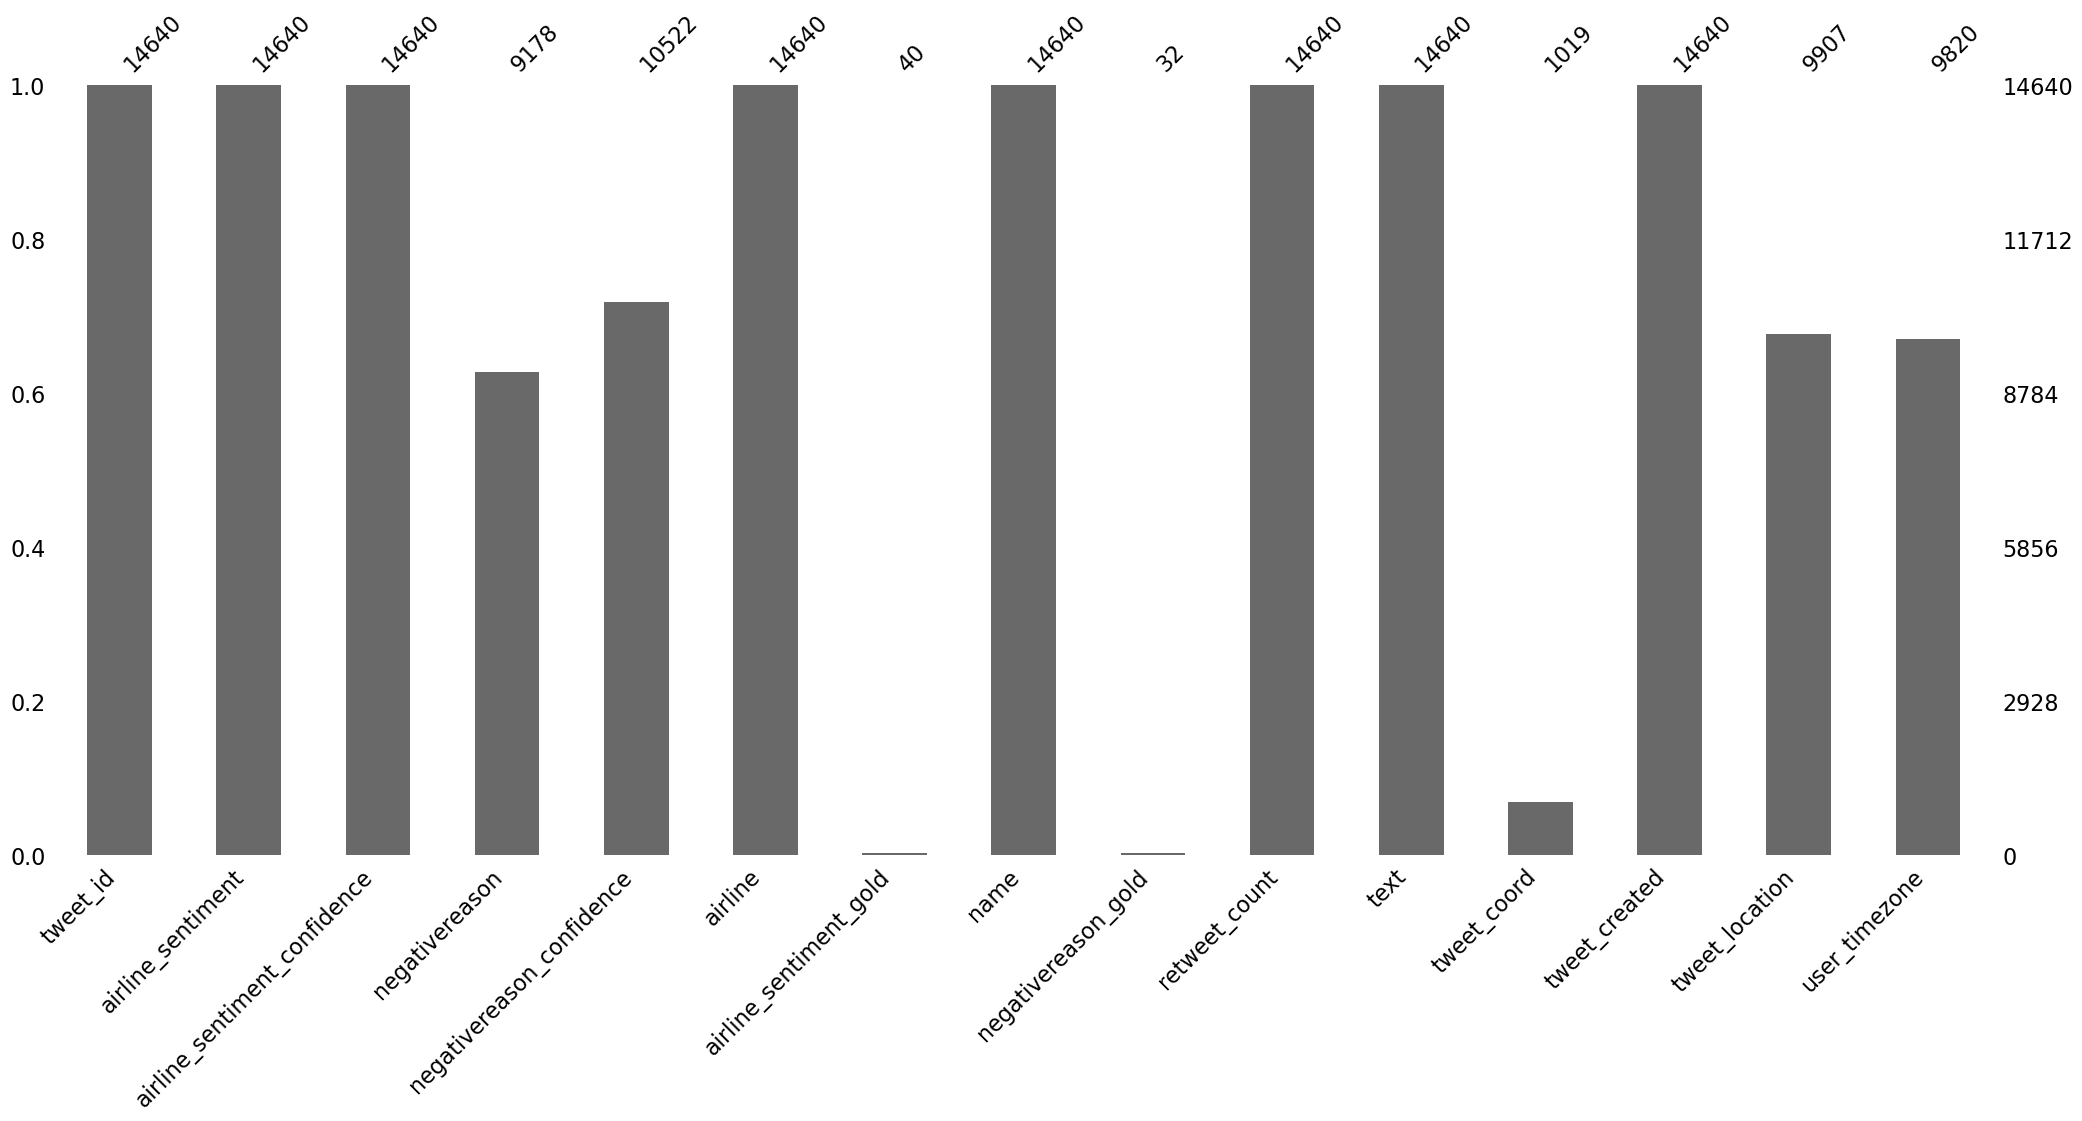

In [13]:
msno.bar(tweets_dataset)

## Remove Columns

In [14]:
columns_to_remove = ['airline_sentiment_gold','negativereason_gold','tweet_coord','name']
tweets_dataset = tweets_dataset.drop(columns=columns_to_remove)

In [15]:
tweets_dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [16]:
numerical_columns = tweets_dataset.select_dtypes(include=['number'])
categorical_columns = tweets_dataset.select_dtypes(exclude=['number'])

# Print the lists of numerical and categorical columns
print('Numerical Columns:')
print(numerical_columns.columns)

print("\nCategorical Columns:")
print(categorical_columns.columns)

Numerical Columns:
Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence',
       'retweet_count'],
      dtype='object')

Categorical Columns:
Index(['airline_sentiment', 'negativereason', 'airline', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')


## Text Cleaning

In [17]:
text = tweets_dataset['text']
text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [18]:
text.iloc[0]

'@VirginAmerica What @dhepburn said.'

In [19]:
text.iloc[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [20]:
import nltk
from nltk.corpus import stopwords
import string
# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize text (split into words)
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Join words back into text
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply the cleaning function to the 'TextColumn'
tweets_dataset['text'] = tweets_dataset['text'].apply(clean_text)

# Display the cleaned DataFrame
print(tweets_dataset)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [21]:
tweets_dataset['text']

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercials exp...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving 20 minutes late flight war...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair 8 ppl need 2 know many seats next ...
Name: text, Length: 14640, dtype: object

## Exploratory Data Analysis (EDA)

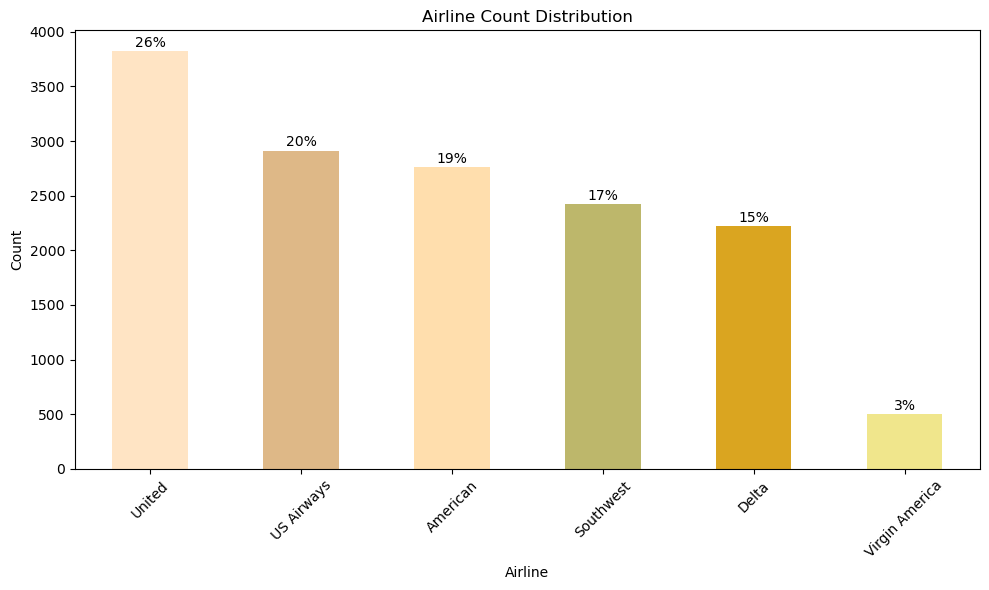

In [22]:
# Count the values of the 'airline' column
value_counts = tweets_dataset['airline'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar', color=['bisque', 'burlywood', 'navajowhite', 'darkkhaki', 'goldenrod', 'khaki'])

# Add percentage labels above each bar
total = len(tweets_dataset)
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax.text(i, v + 10, f'{percentage:.0f}%', ha='center', va='bottom')

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline Count Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
airline_sentiment = tweets_dataset['airline_sentiment'].value_counts()
negativereason = tweets_dataset['negativereason'].value_counts()

print('airline_sentiment:\n',airline_sentiment)


airline_sentiment:
 negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5, 1.0, 'Pie Chart of negative    9178\nneutral     3099\npositive    2363\nName: airline_sentiment, dtype: int64')

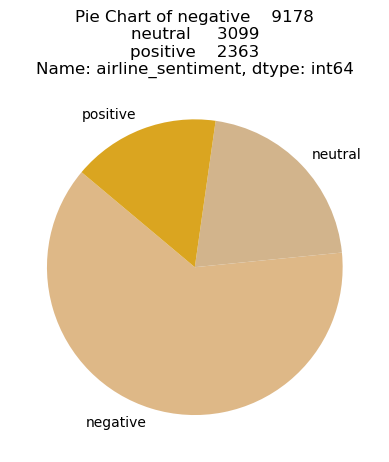

In [24]:
plt.pie(airline_sentiment, labels=airline_sentiment.index,colors=['burlywood', 'tan', 'goldenrod'], startangle=140)
plt.title(f'Pie Chart of {airline_sentiment}')

In [25]:
print('negativereason:\n', negativereason)

negativereason:
 Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


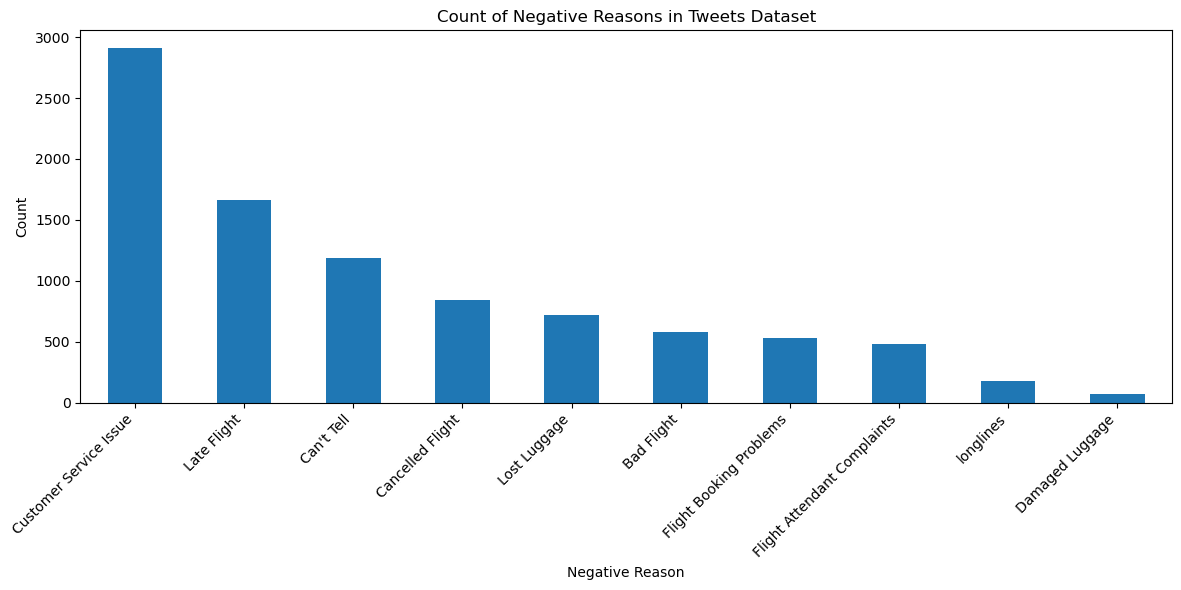

In [26]:
# Count the values of the 'negativereason' column
negativereason_counts = tweets_dataset['negativereason'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
negativereason_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.title('Count of Negative Reasons in Tweets Dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



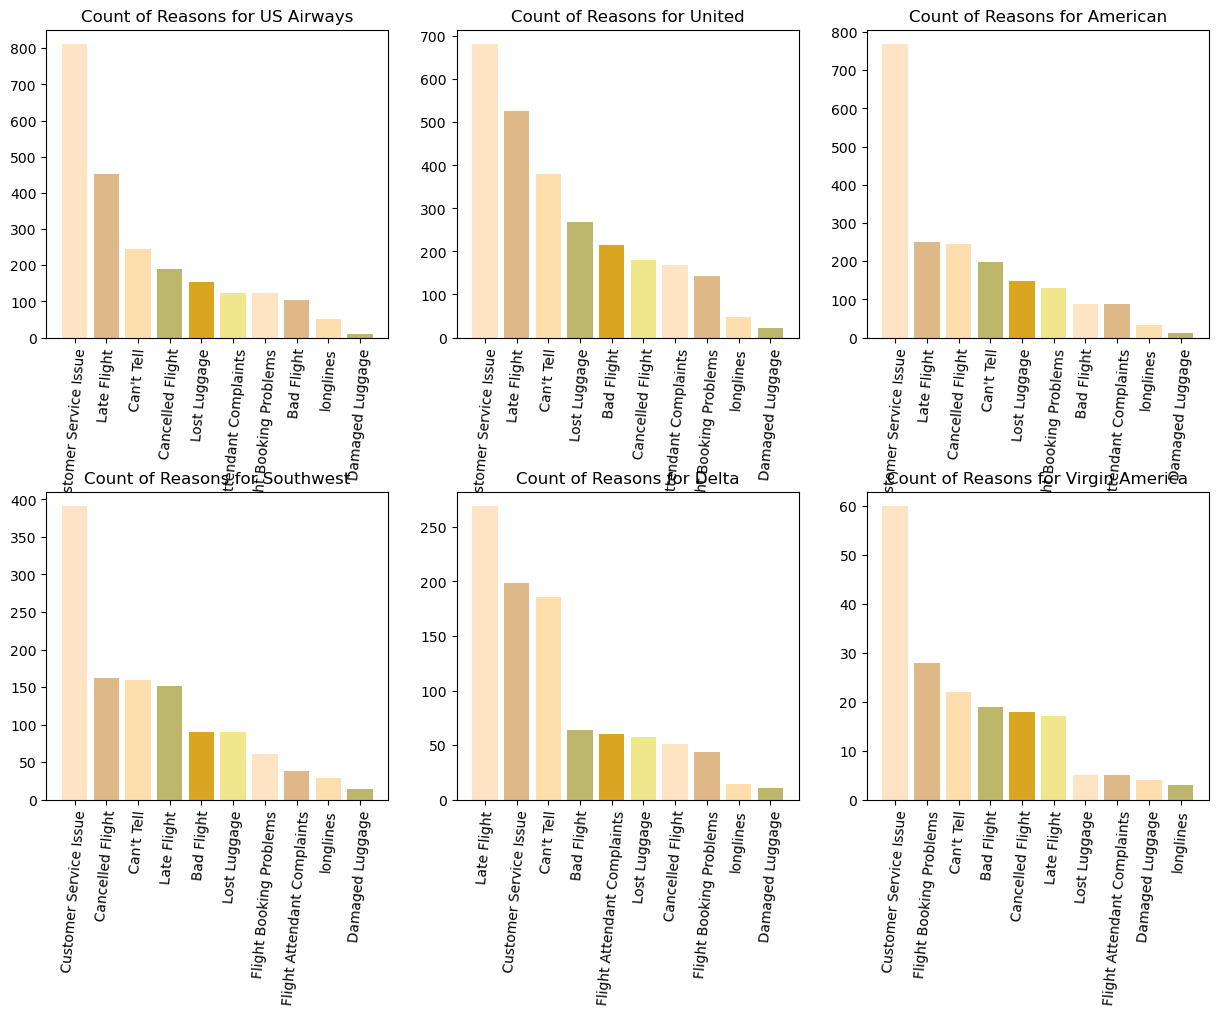

In [27]:
# Assuming you have a DataFrame named 'tweets_dataset' with 'airline' and 'negativereason' columns
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']

def plot_reason(airline):
    airline_data = tweets_dataset[tweets_dataset['airline'] == airline]
    reason_counts = airline_data['negativereason'].value_counts().reset_index()

    plt.bar(reason_counts['index'], reason_counts['negativereason'], color=['bisque', 'burlywood', 'navajowhite', 'darkkhaki', 'goldenrod', 'khaki'])
    plt.xticks(rotation=85)
    plt.title('Count of Reasons for ' + airline)

plt.figure(figsize=(15, 10))
for i, airline in enumerate(airlines, 1):
    plt.subplot(2, 3, i)
    plot_reason(airline)

plt.subplots_adjust(hspace=0.5)
plt.show()


## Cleaning the text

In [28]:
tweets_dataset.text= tweets_dataset.text.str.split('|',expand=True)[0]
tweets_dataset.text

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercials exp...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving 20 minutes late flight war...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair 8 ppl need 2 know many seats next ...
Name: text, Length: 14640, dtype: object

In [29]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
tweets_dataset[' cleaned text'] = tweets_dataset['text'].apply(clean)
tweets_dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,virginamerica dhepburn said,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,virginamerica plus youve added commercials exp...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercials exp...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,virginamerica didnt today must mean need take ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing


Text cleaning is a preprocessing step commonly used in Natural Language Processing (NLP) tasks to prepare text data for analysis or modeling. This code snippet specifically removes special characters and numericals, leaving only alphabetical characters in the text.

## Obtaining the stem words

In [30]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In this code we use the Natural Language Toolkit (NLTK) library to perform various text preprocessing tasks, including tokenization, part-of-speech tagging, and stop word removal. It also downloads necessary NLTK resources.

In [31]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
          
    return newlist 

tweets_dataset['POS tagged'] = tweets_dataset[' cleaned text'].apply(token_stop_pos)
tweets_dataset.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned text,POS tagged
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,virginamerica dhepburn said,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,"[(virginamerica, n), (dhepburn, n), (said, v)]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,virginamerica plus youve added commercials exp...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercials exp...,"[(virginamerica, n), (plus, None), (youve, n),..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,virginamerica didnt today must mean need take ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...,"[(virginamerica, n), (didnt, n), (today, n), (..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,"[(virginamerica, n), (really, r), (aggressive,..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,"[(virginamerica, n), (really, r), (big, a), (b..."


The goal of the provided code is to perform Part-of-Speech (POS) tagging on the text data in the 'cleaned text' column of the 'tweets_dataset' DataFrame. Here's a breakdown of what the code does:

1. **Download NLTK Resources:** The code starts by downloading two NLTK resources:
   - `'omw-1.4'`: This is the Open Multilingual Wordnet resource, which provides multilingual synsets and POS information.
   - `'averaged_perceptron_tagger'`: This resource includes the averaged perceptron POS tagger model.

2. **Define a POS Tagging Dictionary:** The `pos_dict` dictionary maps POS tags obtained from the NLTK POS tagger to WordNet POS tags. WordNet is a lexical database that categorizes words into noun, verb, adjective, adverb, and other categories. This mapping is used to convert NLTK POS tags (e.g., 'JJ' for adjective) to WordNet POS tags (e.g., `wordnet.ADJ`).

3. **Define a Function for Tokenization and POS Tagging:** The `token_stop_pos` function takes a text input and performs the following steps:
   - Tokenizes the text using NLTK's `word_tokenize` function.
   - Tags each token with its POS using NLTK's `pos_tag` function.
   - Filters out stopwords (common words like "the," "and," "is," etc.) from the tokenized text.
   - Creates a list of tuples, where each tuple contains a word and its corresponding WordNet POS tag.

4. **Apply the Function to the DataFrame:** The code applies the `token_stop_pos` function to each row in the 'cleaned text' column of the 'tweets_dataset' DataFrame and stores the result in a new column called 'POS tagged'.

The primary goal of this code is to add a new column to the dataset that contains tokenized words along with their associated POS tags. POS tagging can be useful for various natural language processing tasks, such as text analysis, text classification, and information retrieval, where understanding the grammatical structure and meaning of words is important.

In [32]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

tweets_dataset['Lemma'] = tweets_dataset['POS tagged'].apply(lemmatize)
tweets_dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned text,POS tagged,Lemma
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,virginamerica dhepburn said,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,"[(virginamerica, n), (dhepburn, n), (said, v)]",virginamerica dhepburn say
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,virginamerica plus youve added commercials exp...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercials exp...,"[(virginamerica, n), (plus, None), (youve, n),...",virginamerica plus youve added commercial ex...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,virginamerica didnt today must mean need take ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...,"[(virginamerica, n), (didnt, n), (today, n), (...",virginamerica didnt today must mean need tak...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,"[(virginamerica, n), (really, r), (aggressive,...",virginamerica really aggressive blast obnoxi...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,"[(virginamerica, n), (really, r), (big, a), (b...",virginamerica really big bad thing


1. **Define a Lemmatization Function:** The `lemmatize` function takes as input a list of tuples where each tuple contains a word and its associated POS (Part-of-Speech) tag. It performs the following tasks for each word:
   - If there is no POS tag (empty or None), it considers the word as is without lemmatization.
   - If there is a POS tag, it applies lemmatization using the WordNetLemmatizer with the specified POS tag.
   - The lemmatized words are concatenated into a single string with spaces in between.

2. **Apply the Lemmatization Function to the DataFrame:** The code applies the `lemmatize` function to each row in the 'POS tagged' column of the 'tweets_dataset' DataFrame. The result of lemmatization is stored in a new column called 'Lemma'.

The primary goal of this code is to add a new column to the dataset that contains the lemmatized versions of the words in the text data. Lemmatization helps in standardizing words to their base forms, which can be useful for text analysis and natural language processing tasks, as it reduces inflected words to their common base form for more accurate analysis.

In [33]:
tweets_dataset[['text','Lemma']]

,text,Lemma
0,virginamerica dhepburn said,virginamerica dhepburn say
1,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercial ex...
2,virginamerica didnt today must mean need take ...,virginamerica didnt today must mean need tak...
3,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxi...
4,virginamerica really big bad thing,virginamerica really big bad thing
...,...,...
14635,americanair thank got different flight chicago,americanair thank get different flight chicago
14636,americanair leaving 20 minutes late flight war...,americanair leave minute late flight warning...
14637,americanair please bring american airlines bla...,americanair please bring american airline bl...
14638,americanair money change flight dont answer ph...,americanair money change flight dont answer ...


In [34]:
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

tweets_dataset['Sentiment'] = tweets_dataset['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
tweets_dataset['Analysis'] = tweets_dataset['Sentiment'].apply(vader_analysis)
tweets_dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned text,POS tagged,Lemma,Sentiment,Analysis
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,virginamerica dhepburn said,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,"[(virginamerica, n), (dhepburn, n), (said, v)]",virginamerica dhepburn say,0.0000,Neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,virginamerica plus youve added commercials exp...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercials exp...,"[(virginamerica, n), (plus, None), (youve, n),...",virginamerica plus youve added commercial ex...,0.0000,Neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,virginamerica didnt today must mean need take ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...,"[(virginamerica, n), (didnt, n), (today, n), (...",virginamerica didnt today must mean need tak...,0.0000,Neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,"[(virginamerica, n), (really, r), (aggressive,...",virginamerica really aggressive blast obnoxi...,-0.3306,Negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,"[(virginamerica, n), (really, r), (big, a), (b...",virginamerica really big bad thing,-0.5829,Negative


2. **Define a Sentiment Analysis Function:** The `vadersentimentanalysis` function takes a text review as input and uses the VADER analyzer to calculate a sentiment compound score for the review. The compound score represents the overall sentiment polarity of the text, where positive values indicate positive sentiment, negative values indicate negative sentiment, and values close to zero indicate neutral sentiment.

4. **Define a Function for Sentiment Analysis Labeling:** The `vader_analysis` function takes a sentiment compound score as input and assigns a sentiment label ('Positive', 'Negative', or 'Neutral') based on a threshold. If the compound score is greater than or equal to 0.5, it's labeled as 'Positive'. If the compound score is less than 0, it's labeled as 'Negative'. Otherwise, it's labeled as 'Neutral'.

The primary goal of this code is to analyze and label the sentiment of the text data in the 'Lemma' column using the VADER sentiment analysis tool. This can be useful for categorizing text data into positive, negative, or neutral sentiment categories for sentiment analysis tasks or text understanding applications.

In [93]:
analysis_counts = tweets_dataset['Analysis'].value_counts()
analysis_counts

Neutral     7088
Negative    4009
Positive    3543
Name: Analysis, dtype: int64

In [94]:
tweets_dataset['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

* **0:** negative
* **1:** neutral 
* **2:** positive

In [95]:
airline_sentimentaccount = tweets_dataset['airline_sentiment'].value_counts()
airline_sentimentaccount

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Neutral     7088\nNegative    4009\nPositive    3543\nName: Analysis, dtype: int64')

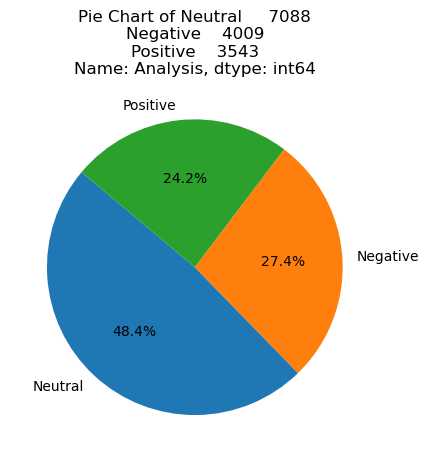

In [96]:
plt.pie(analysis_counts, labels=analysis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {analysis_counts}')

## Worldcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

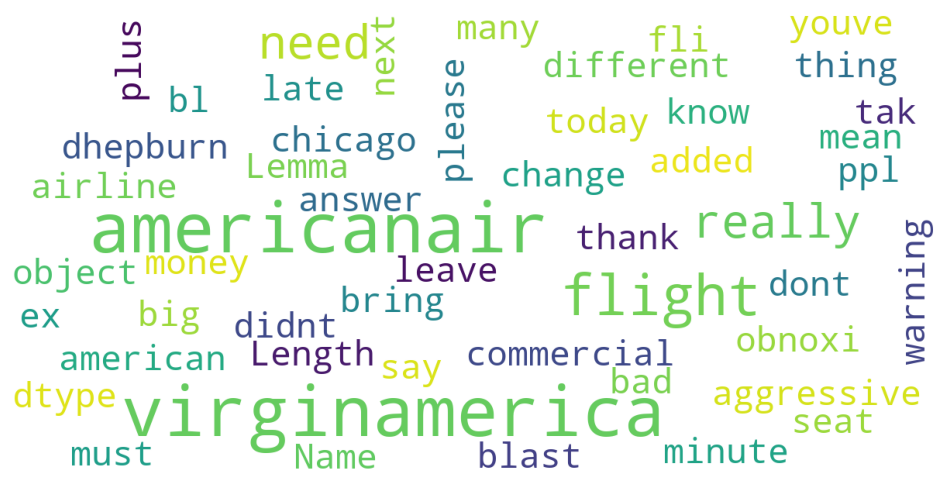

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(tweets_dataset.Lemma)

## Models Development

In [98]:
tweets_dataset.Lemma

0                               virginamerica dhepburn say
1          virginamerica plus youve added commercial ex...
2          virginamerica didnt today must mean need tak...
3          virginamerica really aggressive blast obnoxi...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank get different flight chicago
14636      americanair leave minute late flight warning...
14637      americanair please bring american airline bl...
14638      americanair money change flight dont answer ...
14639      americanair ppl need know many seat next fli...
Name: Lemma, Length: 14640, dtype: object

In [99]:
X = tweets_dataset['Lemma']
y = tweets_dataset['airline_sentiment']

In [100]:

# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [101]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [102]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)


In [103]:
# Split Data into train & test 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)

In [105]:
y_test

18443     neutral
3360     negative
6332     negative
24045    positive
22385    positive
           ...   
11237    negative
16105     neutral
6687      neutral
18757     neutral
23826    positive
Name: airline_sentiment, Length: 5507, dtype: object

### RandomForest

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [48]:
rf_prediction =  rf.predict(X_test)
rf_prediction


array(['neutral', 'positive', 'neutral', ..., 'positive', 'negative',
       'neutral'], dtype=object)

In [49]:
accuracy_score(rf_prediction,y_test)

0.9003086980207009

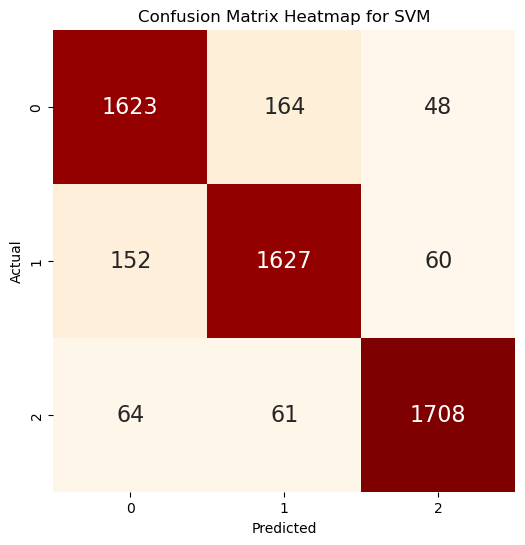

In [52]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, rf_prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='OrRd', cbar=False, square=True, annot_kws={"size": 16})

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for SVM')

plt.show()

### Support Vector Machine

In [53]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [54]:
svm_prediction =  svm.predict(X_test)
svm_prediction

array(['neutral', 'positive', 'neutral', ..., 'positive', 'negative',
       'neutral'], dtype=object)

In [55]:
accuracy_score(svm_prediction,y_test)

0.9057563101507172

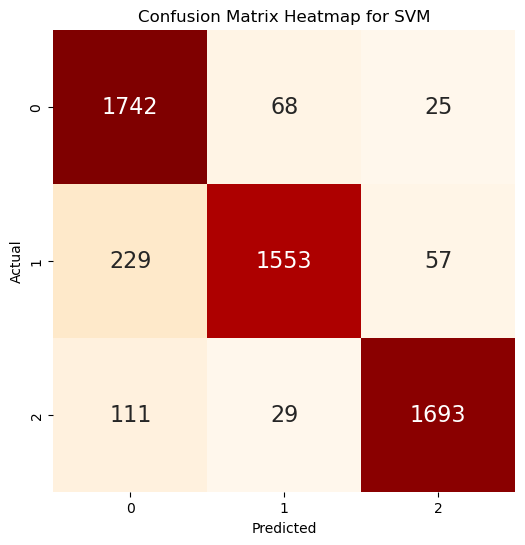

In [56]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, svm_prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='OrRd', cbar=False, square=True, annot_kws={"size": 16})

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for SVM')

plt.show()

### Decision Tree

In [106]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
ds_prediction =  ds.predict(X_test)
ds_prediction

array(['neutral', 'neutral', 'negative', ..., 'neutral', 'neutral',
       'positive'], dtype=object)

In [110]:
accuracy_score(ds_prediction,y_test)

0.786998365716361

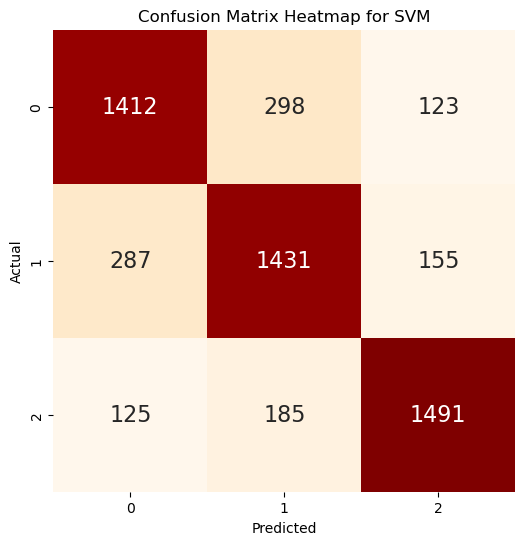

In [109]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, ds_prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='OrRd', cbar=False, square=True, annot_kws={"size": 16})

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for SVM')

plt.show()